In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#Importamos las bibliotecas necesarisa para realizar la activdad.



In [2]:
#Leeremos el archivo de texto que contiene los datos necesarios, realtando las columnas
#que nos interesan.

Desu

df.describe()
df.head()

,FECHA,TEMP,AÑO,MES,DIA,HORA
0,2018-05-11 20:10:00,23.50,2018,5,11,20
1,2018-05-11 20:20:00,22.96,2018,5,11,20
2,2018-05-11 20:30:00,22.73,2018,5,11,20
3,2018-05-11 20:40:00,22.40,2018,5,11,20
4,2018-05-11 20:50:00,22.46,2018,5,11,20


In [3]:
#Ahora, como en la actividad nos lo pide, filtraremos la fecha desde el 11 de noviembre.
fil_df = pd.DataFrame(df[df['FECHA']>="2018-11-1"])
fil_df = fil_df.reset_index(drop=True)
fil_df.head()

fil_df.dtypes


FECHA    datetime64[ns]
TEMP            float64
AÑO               int64
MES               int64
DIA               int64
HORA              int64
dtype: object

In [4]:
#Agrupamos los datos por hora y obtenemos su promedio, así como su temperatura máxima y mínima 
fil_df["TPROM"] = round(fil_df.groupby(['AÑO','MES','DIA','HORA']).transform(np.mean),1)    
fil_df["TMAX"] = round(fil_df.groupby(["AÑO","MES","DIA"])["TPROM"].transform(np.max),1)    
fil_df["TMIN"] = round(fil_df.groupby(["AÑO","MES","DIA"])["TPROM"].transform(np.min),1)
fil_df.head()

,FECHA,TEMP,AÑO,MES,DIA,HORA,TPROM,TMAX,TMIN
0,2018-11-01 00:00:00,9.13,2018,11,1,0,8.7,28.6,6.8
1,2018-11-01 00:10:00,8.89,2018,11,1,0,8.7,28.6,6.8
2,2018-11-01 00:20:00,8.66,2018,11,1,0,8.7,28.6,6.8
3,2018-11-01 00:30:00,8.52,2018,11,1,0,8.7,28.6,6.8
4,2018-11-01 00:40:00,8.47,2018,11,1,0,8.7,28.6,6.8


In [5]:


#Al mismo tiempo, también eliminaremos los datos duplicados en las  columnas correspondientes.
fil_df = fil_df.drop_duplicates(subset=["HORA","DIA","MES","AÑO"])   
fil_df = fil_df.reset_index(drop=True)                              
fil_df.head()


,FECHA,TEMP,AÑO,MES,DIA,HORA,TPROM,TMAX,TMIN
0,2018-11-01 00:00:00,9.130,2018,11,1,0,8.7,28.6,6.8
1,2018-11-01 01:00:00,8.560,2018,11,1,1,8.5,28.6,6.8
2,2018-11-01 02:00:00,8.830,2018,11,1,2,8.7,28.6,6.8
3,2018-11-01 03:00:00,9.130,2018,11,1,3,8.8,28.6,6.8
4,2018-11-01 04:00:00,7.924,2018,11,1,4,7.4,28.6,6.8


In [6]:
#Ahora, bajo los criterios de la actividad, empezaremos a analizar las horas se frío contables.
#Al mismo tiempo, llenaremos una lista que contenga el conteo de estas horas de frío.
UF  = []
for i in range (0,len(fil_df)):
        if (fil_df['TPROM'][i] <= 1.4):
            UF.append(0)
        elif (1.5 <= fil_df['TPROM'][i] <= 2.4):
            UF.append(0.5)
        elif (2.5 <= fil_df['TPROM'][i] <= 9.1):
            UF.append(1.0)
        elif (9.2 <= fil_df['TPROM'][i] <= 12.4):
            UF.append(0.5)
        elif (12.5 <= fil_df['TPROM'][i] <= 15.9):
            UF.append(0)
        elif (16 <= fil_df['TPROM'][i] <= 18):
            UF.append(-0.5)
        elif (18 < fil_df['TPROM'][i]):
            UF.append(-1)

#Ahora, al mismo dataframe le agregamos una columa que contenga los unidades de frío de cada hora.

fil_df["UF"] = UF
fil_df.tail()

,FECHA,TEMP,AÑO,MES,DIA,HORA,TPROM,TMAX,TMIN,UF
2618,2019-02-18 03:00:00,5.558,2019,2,18,3,5.4,6.8,3.4,1.0
2619,2019-02-18 04:00:00,4.901,2019,2,18,4,4.7,6.8,3.4,1.0
2620,2019-02-18 05:00:00,4.347,2019,2,18,5,4.2,6.8,3.4,1.0
2621,2019-02-18 06:00:00,3.869,2019,2,18,6,3.7,6.8,3.4,1.0
2622,2019-02-18 07:00:00,3.492,2019,2,18,7,3.4,6.8,3.4,1.0


In [7]:
#Nos interesa las unidades de frío acomuladas por día.
fil_df["UF24"] = fil_df.groupby(['AÑO','MES','DIA'])["UF"].transform("sum")
#Así que colocaremos una nueva columna que columna que tenga estas acomulaciones.
fil_df.head()

,FECHA,TEMP,AÑO,MES,DIA,HORA,TPROM,TMAX,TMIN,UF,UF24
0,2018-11-01 00:00:00,9.130,2018,11,1,0,8.7,28.6,6.8,1.0,-0.5
1,2018-11-01 01:00:00,8.560,2018,11,1,1,8.5,28.6,6.8,1.0,-0.5
2,2018-11-01 02:00:00,8.830,2018,11,1,2,8.7,28.6,6.8,1.0,-0.5
3,2018-11-01 03:00:00,9.130,2018,11,1,3,8.8,28.6,6.8,1.0,-0.5
4,2018-11-01 04:00:00,7.924,2018,11,1,4,7.4,28.6,6.8,1.0,-0.5


In [8]:
#Este dataframe contiene los datos separados por día.

fil24_df = pd.DataFrame(fil_df.drop_duplicates(['AÑO','MES','DIA']))


##Eliminamos las columnas innecesarias.
fil24_df = fil24_df.drop(['HORA'],1)
fil24_df = fil24_df.drop(['UF'],1)

#Reiniciamos.
fil24_df = fil24_df.reset_index(drop=True)


In [9]:
#Creamos una nueva columna que almacene la acomulación de unidades de frío diarias.
fil24_df['UF24TOT']=np.cumsum(fil24_df['UF24'])
fil24_df.head()



,FECHA,TEMP,AÑO,MES,DIA,TPROM,TMAX,TMIN,UF24,UF24TOT
0,2018-11-01,9.13,2018,11,1,8.7,28.6,6.8,-0.5,-0.5
1,2018-11-02,10.79,2018,11,2,10.6,31.0,10.2,-9.0,-9.5
2,2018-11-03,12.85,2018,11,3,12.5,30.0,10.5,-9.5,-19.0
3,2018-11-04,13.14,2018,11,4,12.7,31.2,11.7,-11.5,-30.5
4,2018-11-05,14.41,2018,11,5,13.9,31.1,11.4,-8.0,-38.5


In [10]:
iDIAS = 1                       #Contador de días inicial
DIAS = []                       #Arreglo que almacena el número de días
tmxDIAS = []                    #Arreglo que almacena la temperatura máxima para cada día
tmnDIAS = []                    #Arreglo que almacena la temperatura mínima para cada día
uf24DIAS = []                   #Arreglo que almacena la suma de unidades de frío para cada día 
uf24tot = []                    #Arreglo que almacena el total de unidades de frío
for i in range(0,len(fil24_df)):        
    nDIAS = [iDIAS + i]                 
    DIAS.append(nDIAS)                  
    ntmxDIAS = [fil24_df['TMAX'][i]]    
    tmxDIAS.append(ntmxDIAS)            
    ntmnDIAS = [fil24_df['TMIN'][i]]     
    tmnDIAS.append(ntmnDIAS)            
    nuf24DIAS = [fil24_df['UF24'][i]]    
    uf24DIAS.append(nuf24DIAS)          
    nuf24tot = [fil24_df['UF24TOT'][i]]  
    uf24tot.append(nuf24tot)

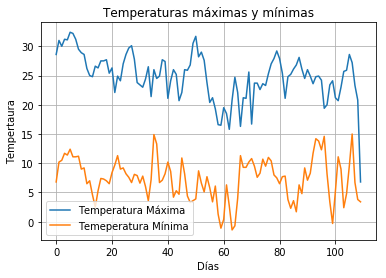

In [11]:
#Gráfica de la tempertaura máxima y mínima diaria.
plt.plot(tmxDIAS, label="Temperatura Máxima")
plt.plot(tmnDIAS, label="Temeperatura Mínima")
#Propiedades de la gráfica.
plt.xlabel("Días")
plt.ylabel("Tempertaura")
plt.grid()
plt.legend()

plt.title("Temperaturas máximas y mínimas")
plt.savefig("maxmin")


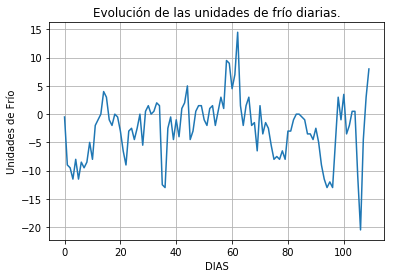

In [12]:
#Gráfica de las unidades de frío a través del tiempo.
plt.plot(uf24DIAS)
plt.grid()
plt.xlabel("DIAS")
plt.ylabel("Unidades de Frío")

plt.title("Evolución de las unidades de frío diarias.")
plt.savefig("ufd")


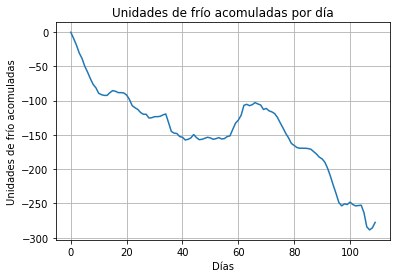

In [13]:
#Gráfica de los valores acomulados de las unidades de frió por día.
plt.plot(uf24tot)

plt.xlabel("Días")
plt.ylabel("Unidades de frío acomuladas")
plt.grid()
plt.title("Unidades de frío acomuladas por día")
plt.savefig("uftot")

In [14]:
#Ahora trabajaremos con el modelo Grageda, el cual compararemos con el modelo UTAH.
#Creamos un nuevo dataframe para trabajar con este modelo.
gg_df = pd.DataFrame(fil_df)
gg_df = gg_df.drop(['UF'],1)
gg_df = gg_df.drop(['UF24'],1)
gg_df.head()


,FECHA,TEMP,AÑO,MES,DIA,HORA,TPROM,TMAX,TMIN
0,2018-11-01 00:00:00,9.130,2018,11,1,0,8.7,28.6,6.8
1,2018-11-01 01:00:00,8.560,2018,11,1,1,8.5,28.6,6.8
2,2018-11-01 02:00:00,8.830,2018,11,1,2,8.7,28.6,6.8
3,2018-11-01 03:00:00,9.130,2018,11,1,3,8.8,28.6,6.8
4,2018-11-01 04:00:00,7.924,2018,11,1,4,7.4,28.6,6.8


In [15]:
#Con los criterios del modelo, obendremos las horas frío y las hora calor.
HF  = [] 
HC  = [] 
for i in range (0,len(gg_df)):
        if ( gg_df['TPROM'][i] <= 0 ):
            HF.append(0)
            HC.append(0)
        elif ( 0 < gg_df['TPROM'][i] <= 10):
            HF.append(1)
            HC.append(0)
        elif (10 < gg_df['TPROM'][i] < 25):
            HF.append(0)
            HC.append(0)
        elif (25 <= gg_df['TPROM'][i]):
            HF.append(0)
            HC.append(1)
            
#Estos resultados los agregamos a nuestro nuevo dataframe.
gg_df["HF"] = HF
gg_df["HC"] = HC
gg_df.head()


,FECHA,TEMP,AÑO,MES,DIA,HORA,TPROM,TMAX,TMIN,HF,HC
0,2018-11-01 00:00:00,9.130,2018,11,1,0,8.7,28.6,6.8,1,0
1,2018-11-01 01:00:00,8.560,2018,11,1,1,8.5,28.6,6.8,1,0
2,2018-11-01 02:00:00,8.830,2018,11,1,2,8.7,28.6,6.8,1,0
3,2018-11-01 03:00:00,9.130,2018,11,1,3,8.8,28.6,6.8,1,0
4,2018-11-01 04:00:00,7.924,2018,11,1,4,7.4,28.6,6.8,1,0


In [16]:
#Ahora, obtenedremos las horas frío y las hora calor para cada día (acomulcaión de horas)
gg_df["HF24"] = gg_df.groupby(['AÑO','MES','DIA'])["HF"].transform("sum") 
gg_df["HC24"] = gg_df.groupby(['AÑO','MES','DIA'])["HC"].transform("sum") 
gg_df.head()

,FECHA,TEMP,AÑO,MES,DIA,HORA,TPROM,TMAX,TMIN,HF,HC,HF24,HC24
0,2018-11-01 00:00:00,9.130,2018,11,1,0,8.7,28.6,6.8,1,0,8,6
1,2018-11-01 01:00:00,8.560,2018,11,1,1,8.5,28.6,6.8,1,0,8,6
2,2018-11-01 02:00:00,8.830,2018,11,1,2,8.7,28.6,6.8,1,0,8,6
3,2018-11-01 03:00:00,9.130,2018,11,1,3,8.8,28.6,6.8,1,0,8,6
4,2018-11-01 04:00:00,7.924,2018,11,1,4,7.4,28.6,6.8,1,0,8,6


In [17]:
#Creamos un dataframe que separe los datos por día y eliminamos las columnas innecearias.
ggd_df = pd.DataFrame(gg_df.drop_duplicates(['AÑO','MES','DIA']))
ggd_df = ggd_df.reset_index(drop=True)

ggd_df = ggd_df.drop(['HF'],1)
ggd_df = ggd_df.drop(['HC'],1)
ggd_df = ggd_df.drop(['HORA'],1)

ggd_df.head()

,FECHA,TEMP,AÑO,MES,DIA,TPROM,TMAX,TMIN,HF24,HC24
0,2018-11-01,9.13,2018,11,1,8.7,28.6,6.8,8,6
1,2018-11-02,10.79,2018,11,2,10.6,31.0,10.2,0,8
2,2018-11-03,12.85,2018,11,3,12.5,30.0,10.5,0,8
3,2018-11-04,13.14,2018,11,4,12.7,31.2,11.7,0,8
4,2018-11-05,14.41,2018,11,5,13.9,31.1,11.4,0,8


In [18]:
#Como las horas de frío efectivo es la diferencia entre las horas frío y las horas caliente
#procedemos a crear una columna que contenga estas diferencias.
ggd_df["HFE"] = ggd_df['HF24'] - ggd_df['HC24']
ggd_df.head()

,FECHA,TEMP,AÑO,MES,DIA,TPROM,TMAX,TMIN,HF24,HC24,HFE
0,2018-11-01,9.13,2018,11,1,8.7,28.6,6.8,8,6,2
1,2018-11-02,10.79,2018,11,2,10.6,31.0,10.2,0,8,-8
2,2018-11-03,12.85,2018,11,3,12.5,30.0,10.5,0,8,-8
3,2018-11-04,13.14,2018,11,4,12.7,31.2,11.7,0,8,-8
4,2018-11-05,14.41,2018,11,5,13.9,31.1,11.4,0,8,-8


In [19]:
#Este dataframe servirá para realizar la comparación entre las horas de frío calculadas
#en ambos modelos.
comp_df = pd.DataFrame(fil24_df)
comp_df['HFE'] = ggd_df['HFE']

#Agragamos la acomulación de los valores de unidad de frío.
comp_df['HFETOT']=np.cumsum(comp_df['HFE'])

comp_df.head()

,FECHA,TEMP,AÑO,MES,DIA,TPROM,TMAX,TMIN,UF24,UF24TOT,HFE,HFETOT
0,2018-11-01,9.13,2018,11,1,8.7,28.6,6.8,-0.5,-0.5,2,2
1,2018-11-02,10.79,2018,11,2,10.6,31.0,10.2,-9.0,-9.5,-8,-6
2,2018-11-03,12.85,2018,11,3,12.5,30.0,10.5,-9.5,-19.0,-8,-14
3,2018-11-04,13.14,2018,11,4,12.7,31.2,11.7,-11.5,-30.5,-8,-22
4,2018-11-05,14.41,2018,11,5,13.9,31.1,11.4,-8.0,-38.5,-8,-30


In [20]:
#Creamos listas para poder graficar estos datos.
HFE = [comp_df['HFE'][i] for i in range(0,len(comp_df))]
HFEtot = [comp_df['HFETOT'][i] for i in range(0,len(comp_df))]

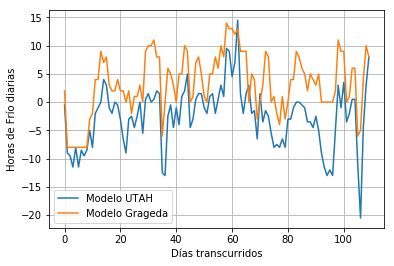

In [22]:
#Gráfica de la comparación de las horas de frío diarias en ambos modelos.
plt.plot(uf24DIAS, label="Modelo UTAH")
plt.plot(HFE, label="Modelo Grageda")

#Propiedades de la gráfica.
plt.legend()
plt.grid()

plt.xlabel("Días transcurridos")
plt.ylabel("Horas de Frío diarias")

plt.savefig("comp")

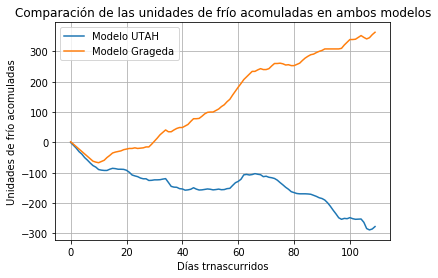

In [24]:
#Ahora, la comparación de ls horas de frío acomuladas en cada modelo.
plt.plot(uf24tot, label="Modelo UTAH")
plt.plot(HFEtot, label="Modelo Grageda")

#Propiedades de la gráfica.
plt.legend()
plt.grid()

plt.xlabel("Días trnascurridos")
plt.ylabel("Unidades de frío acomuladas")
plt.title("Comparación de las unidades de frío acomuladas en ambos modelos")

plt.savefig("comptot")